# USVP  1

## Python 3.X instalation 

### Windows

PythonXY https://code.google.com/p/pythonxy/

WinPython http://winpython.github.io/

Anaconda https://store.continuum.io/cshop/anaconda/

### Linux

Two versions of Python (2.7 and 3.6) are usually installed in the Linux distribution .

## IDE

PyCharm https://www.jetbrains.com/pycharm/

Visual Studio Code https://code.visualstudio.com/

případně další https://wiki.python.org/moin/IntegratedDevelopmentEnvironments

In [ ]:
# priprava pro Jupyter notebook
%pylab inline


Error: Failed to connect to Jupyter notebook. 
http://localhost:8889/
TypeError: request to http://localhost:8889/api/contents/?1582702198539 failed, reason: connect ECONNREFUSED ::1:8889

## Python basics

In [2]:
print("Hello World")

Hello World


In [9]:
import numpy as np 

nums = [0, 1, 6, 3, 4, 5] # List
print(nums) # Print List
nums[2] # Access to the third item of the List
num[1:3] # Access to the second and third item of the list
nums[::-1] # Reversed list

matrix = np.ones([10,10], dtype=np.uint8) # Numpy matrix 10x10 contains ones in all cells
matrix_zero = np.zeros([10,10], dtype=np.uint8) # Numpy matrix 10x10 contains zeros in all cells
matrix[1:3,3:6] = 2 # Set cells value in the part of the matrix to the value 2
print(matice) # print whole matrix
array = matice.ravel() # transorm matrix to 1D array




[5, 3, 1]
[[255 255 255 255 255 255 255 255 255 255]
 [255 255 255   2   2   2 255 255 255 255]
 [255 255 255   2   2   2 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]]
[255 255 255 255 255 255 255 255 255 255 255 255 255   2   2   2 255 255
 255 255 255 255 255   2   2   2 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255]


## Image Processing

In [3]:
import scipy
import scipy.misc
import skimage
import skimage.data
from skimage.io import imread

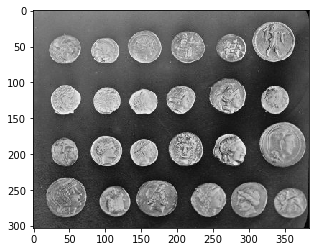

In [5]:
import matplotlib.pyplot as plt

img = skimage.data.coins()

plt.imshow(img, cmap="gray")
plt.show()


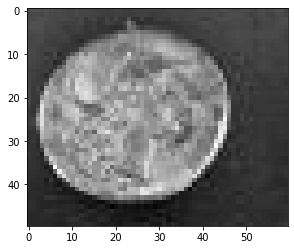

In [7]:
plt.imshow(img[30:80, 20:80], cmap="gray")
plt.show()

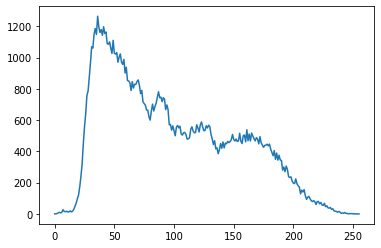

In [13]:
def histogram(image):
    hist = np.zeros(256, dtype=int)
    for i in img.ravel():
        hist[i] += 1
    return hist

h = histogram(img)

plt.plot(h)
plt.show()


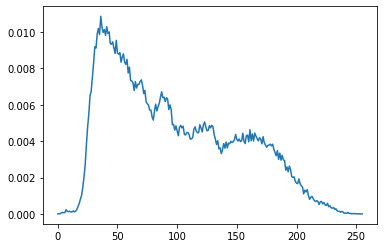

In [15]:
plt.plot(h/(img.shape[0]*img.shape[1]))
plt.show()

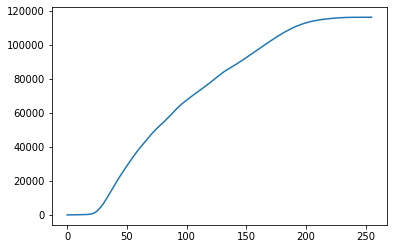

In [20]:
def cumulative(hist):
    chist = hist.copy()
    for i in range(1, len(chist)):
        chist[i] += chist[i-1] 
    return chist

c = cumulative(h)

plt.plot(c)
plt.show()
